# Assignment Python 1 / Advanced Visual


Nama : Wilda Amrul Munafiah

Program : Python for Data Science

Kode Peserta : PYTN-KS16-021



The Dataset : London Crime from Jan 2008 - Dec 2016 didapat dari kaggle melalui link berikut: https://www.kaggle.com/datasets/jboysen/london-crime

This dataset is a record of crime in major metropolitan areas, such as London, occurs in distinct patterns. This data covers the number of criminal reports by month, LSOA borough, and major/minor category from Jan 2008-Dec 2016.
1. What is the change in the number of crime incidents from 2011 to 2016

2. What were the top 3 crimes per borough in 2016


## Import Library

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

from wordcloud import WordCloud, STOPWORDS
Stopword=set(STOPWORDS)
from PIL import Image

import folium

## Load Data

In [2]:
London = pd.read_csv('london_crime_by_lsoa_Asli.csv')
London

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [3]:
London.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [4]:
London.columns

Index(['lsoa_code', 'borough', 'major_category', 'minor_category', 'value',
       'year', 'month'],
      dtype='object')

In [5]:
London.index

RangeIndex(start=0, stop=13490604, step=1)

In [6]:
London.shape

(13490604, 7)

In [7]:
Criminal =London[London['value']==1]
Criminal

,lsoa_code,borough,major_category,minor_category,value,year,month
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
16,E01000086,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
25,E01001794,Hackney,Violence Against the Person,Harassment,1,2013,2
32,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
43,E01001193,Croydon,Theft and Handling,Other Theft,1,2014,5
...,...,...,...,...,...,...,...
13490566,E01000738,Bromley,Burglary,Burglary in a Dwelling,1,2009,1
13490572,E01033735,Greenwich,Criminal Damage,Criminal Damage To Motor Vehicle,1,2013,8
13490584,E01003301,Lewisham,Violence Against the Person,Assault with Injury,1,2015,10
13490590,E01001679,Greenwich,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,4


## Area Plot

#### Questions :
Dari data yang tersedia, Wilayah mana yang menduduki Top 5 untuk jumlah kasus kriminal yang terjadi ?

In [8]:
# Membuat data frame baru
London_new = London.copy()

In [9]:
# Menambahkan agregat pada dataframe yang baru dengan perintah groupby
London1=London_new.groupby(['borough','year'])[['value']].sum().reset_index()

In [10]:
# Membuat tabel pivot dengan value sebagai value
pivot = London1.pivot(index="borough", columns="year", values="value")
pivot["total"] = pivot.sum(axis=1)
pivot = pivot.sort_values(by = ['total'], ascending = False)

In [11]:
# Menentukan 5 wilayah teratas jumlah kasus kriminal
top_5=pivot.head()
top_5 = top_5.drop(columns={'total'})
top_5 = top_5.transpose()
top_5

borough,Westminster,Lambeth,Southwark,Camden,Newham
year,,,,,
2008,47846,31717,33470,32010,29752
2009,48456,31225,30623,31612,28610
2010,48116,31671,31320,31804,30728
2011,54243,33224,30723,33956,27978
2012,59226,33473,30737,31472,30067
2013,53852,31868,31128,28435,27577
2014,47564,31765,28912,27198,28005
2015,47395,33164,30260,29477,29217
2016,48330,34071,31636,29183,30090


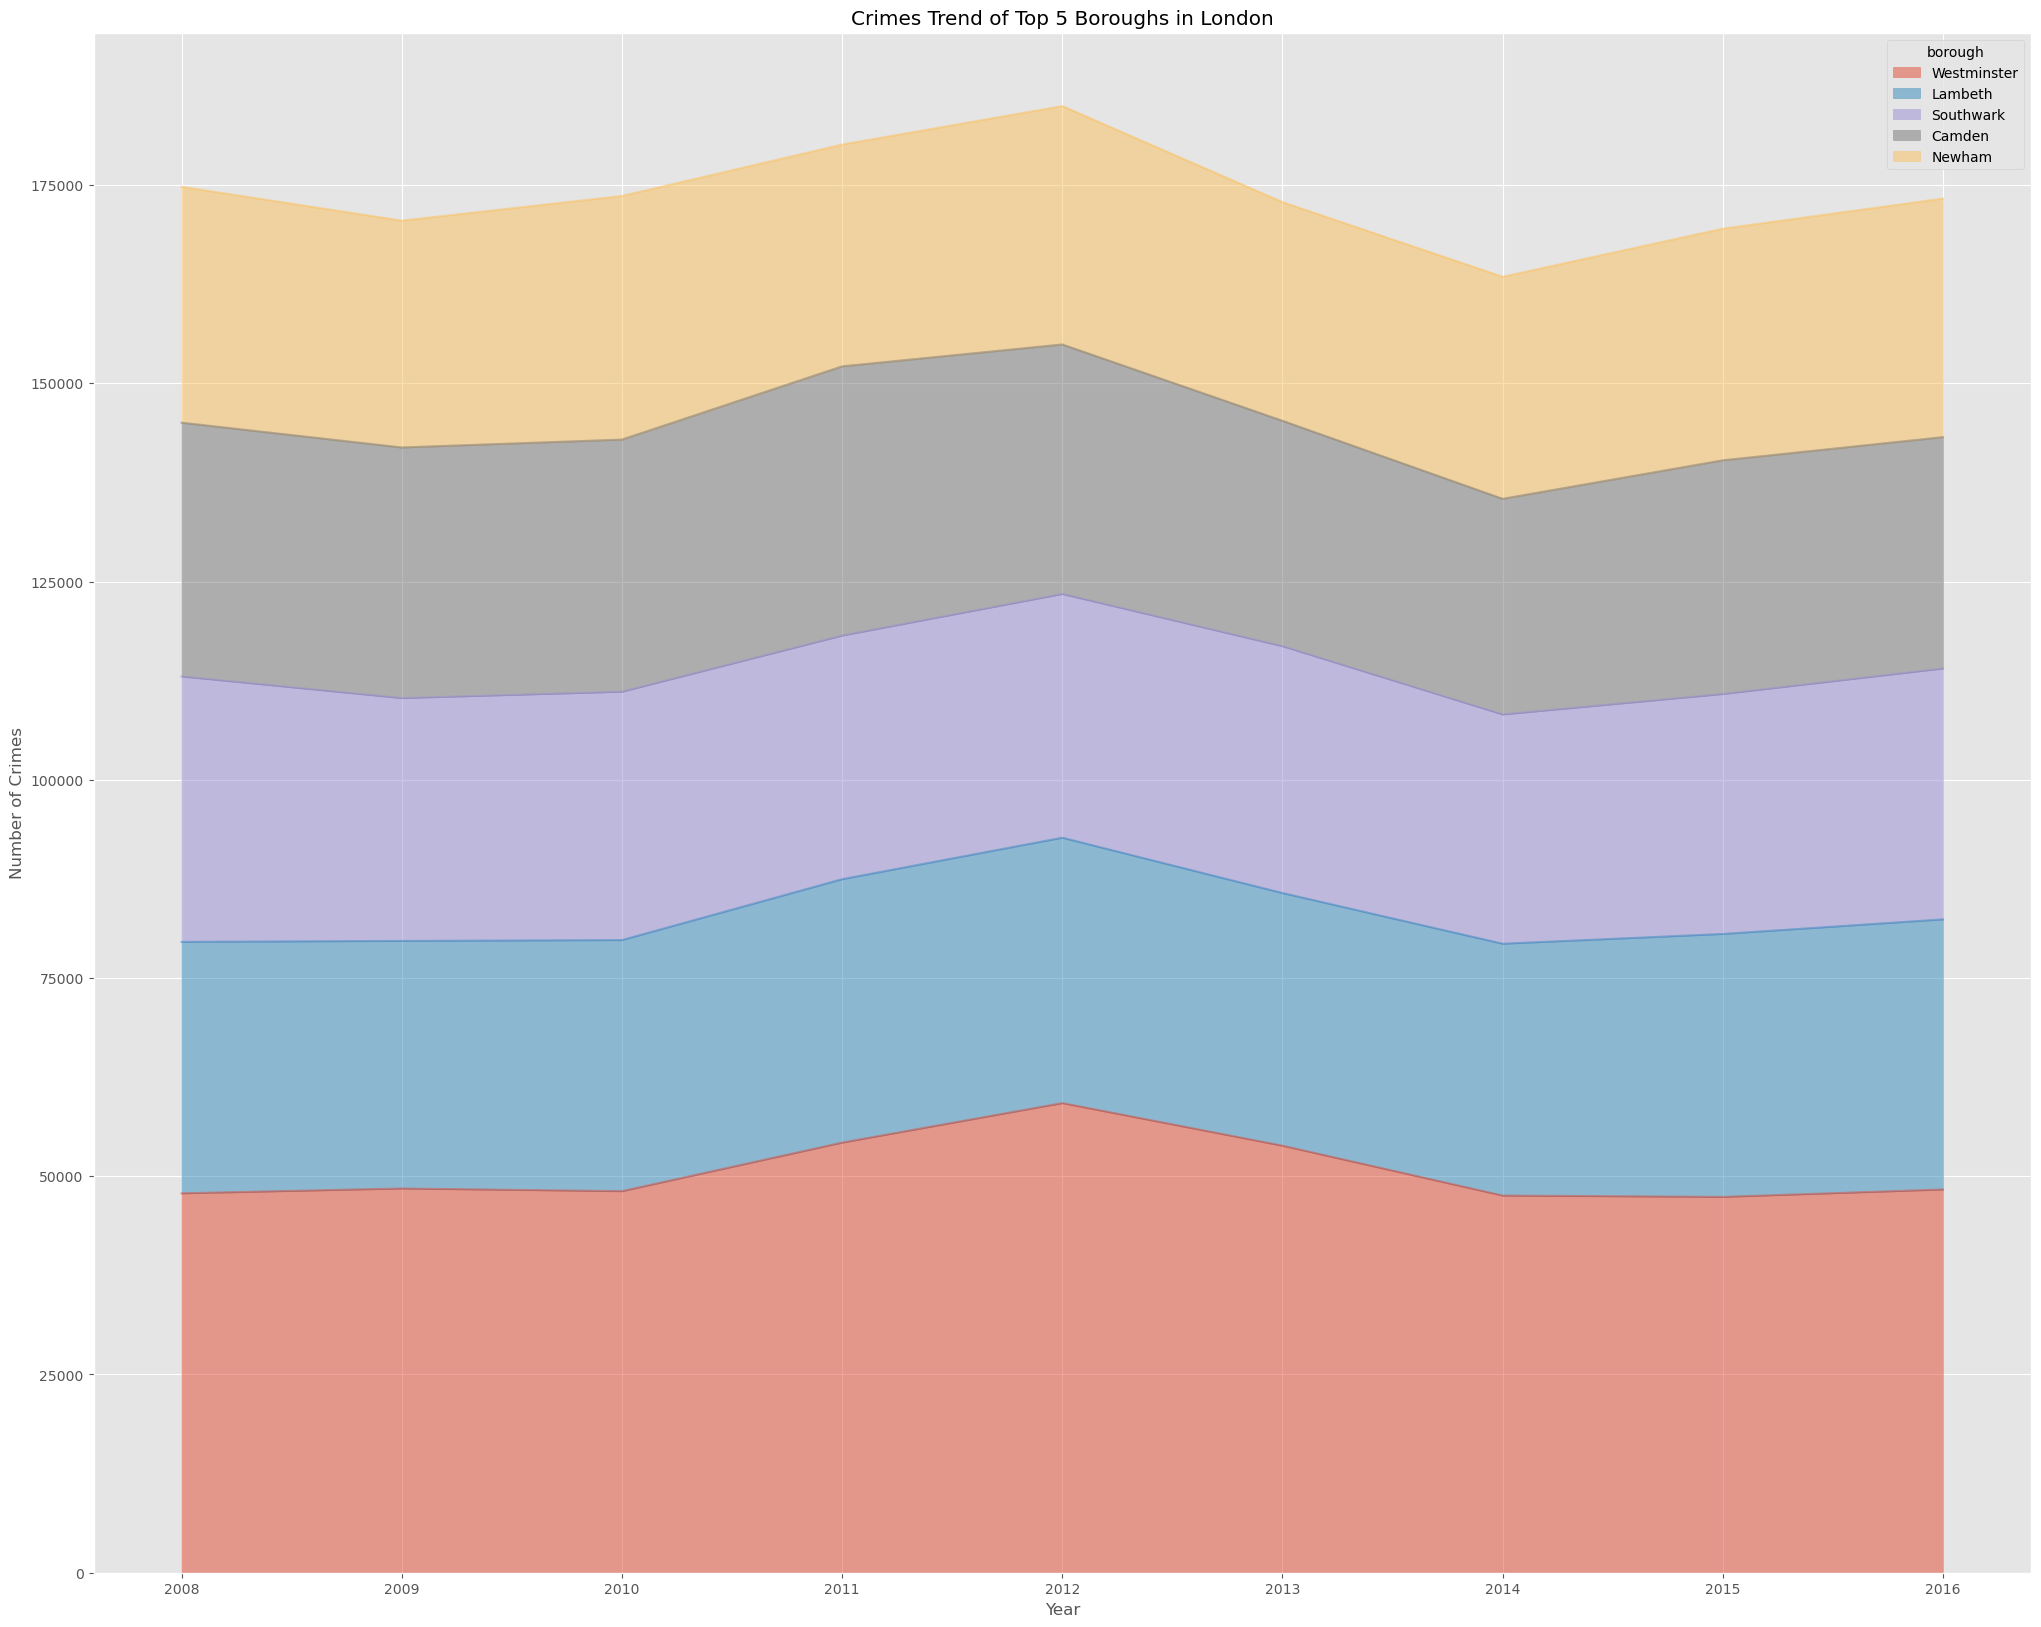

In [12]:
# membuat Visualisasi (membuat Area plot)
top_5.plot(kind="area",
                    stacked=True,
                    figsize=(25,20),
                    alpha=0.5
                    )
plt.title("Crimes Trend of Top 5 Boroughs in London")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")

#Display plot
plt.show()

#### Insight :
Crime Top 5 borough in London at 2008 - 2016
1. Westminster tahun 2012
2. Lambeth tahun 2016
3. Southwark tahun 2008
4. Camden NaN
5. Newham tahun 2010
    

## Bar Chart
 #### Questions:
 Bagaimana perbandingan antara jumlah kasus kriminal yang terjadi berdasarkan wilayah?

In [13]:
London2 = London.groupby(['borough', 'major_category'])[['value']].sum().reset_index()
London2.rename(columns={"value":"total_kasus"}, inplace=True)

London2 = London2.pivot(index="borough", columns="major_category", values="total_kasus")
London2

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
borough,,,,,,,,,
Barking and Dagenham,18103.0,18888.0,9188.0,205.0,2819.0,6105.0,49.0,50999.0,43091.0
Barnet,36981.0,21024.0,9796.0,175.0,2953.0,7374.0,38.0,87285.0,46565.0
Bexley,14973.0,17244.0,7346.0,106.0,1999.0,2338.0,22.0,40071.0,30037.0
Brent,28923.0,20569.0,25978.0,157.0,3711.0,12473.0,39.0,72523.0,63178.0
Bromley,27135.0,24039.0,8942.0,196.0,2637.0,4868.0,31.0,69742.0,46759.0
Camden,27939.0,18482.0,21816.0,123.0,3857.0,9286.0,36.0,140596.0,53012.0
City of London,15.0,16.0,33.0,NaN,17.0,24.0,NaN,561.0,114.0
Croydon,33376.0,31218.0,19162.0,270.0,4340.0,12645.0,55.0,91437.0,67791.0
Ealing,30831.0,25613.0,18591.0,175.0,4406.0,9568.0,52.0,93834.0,68492.0


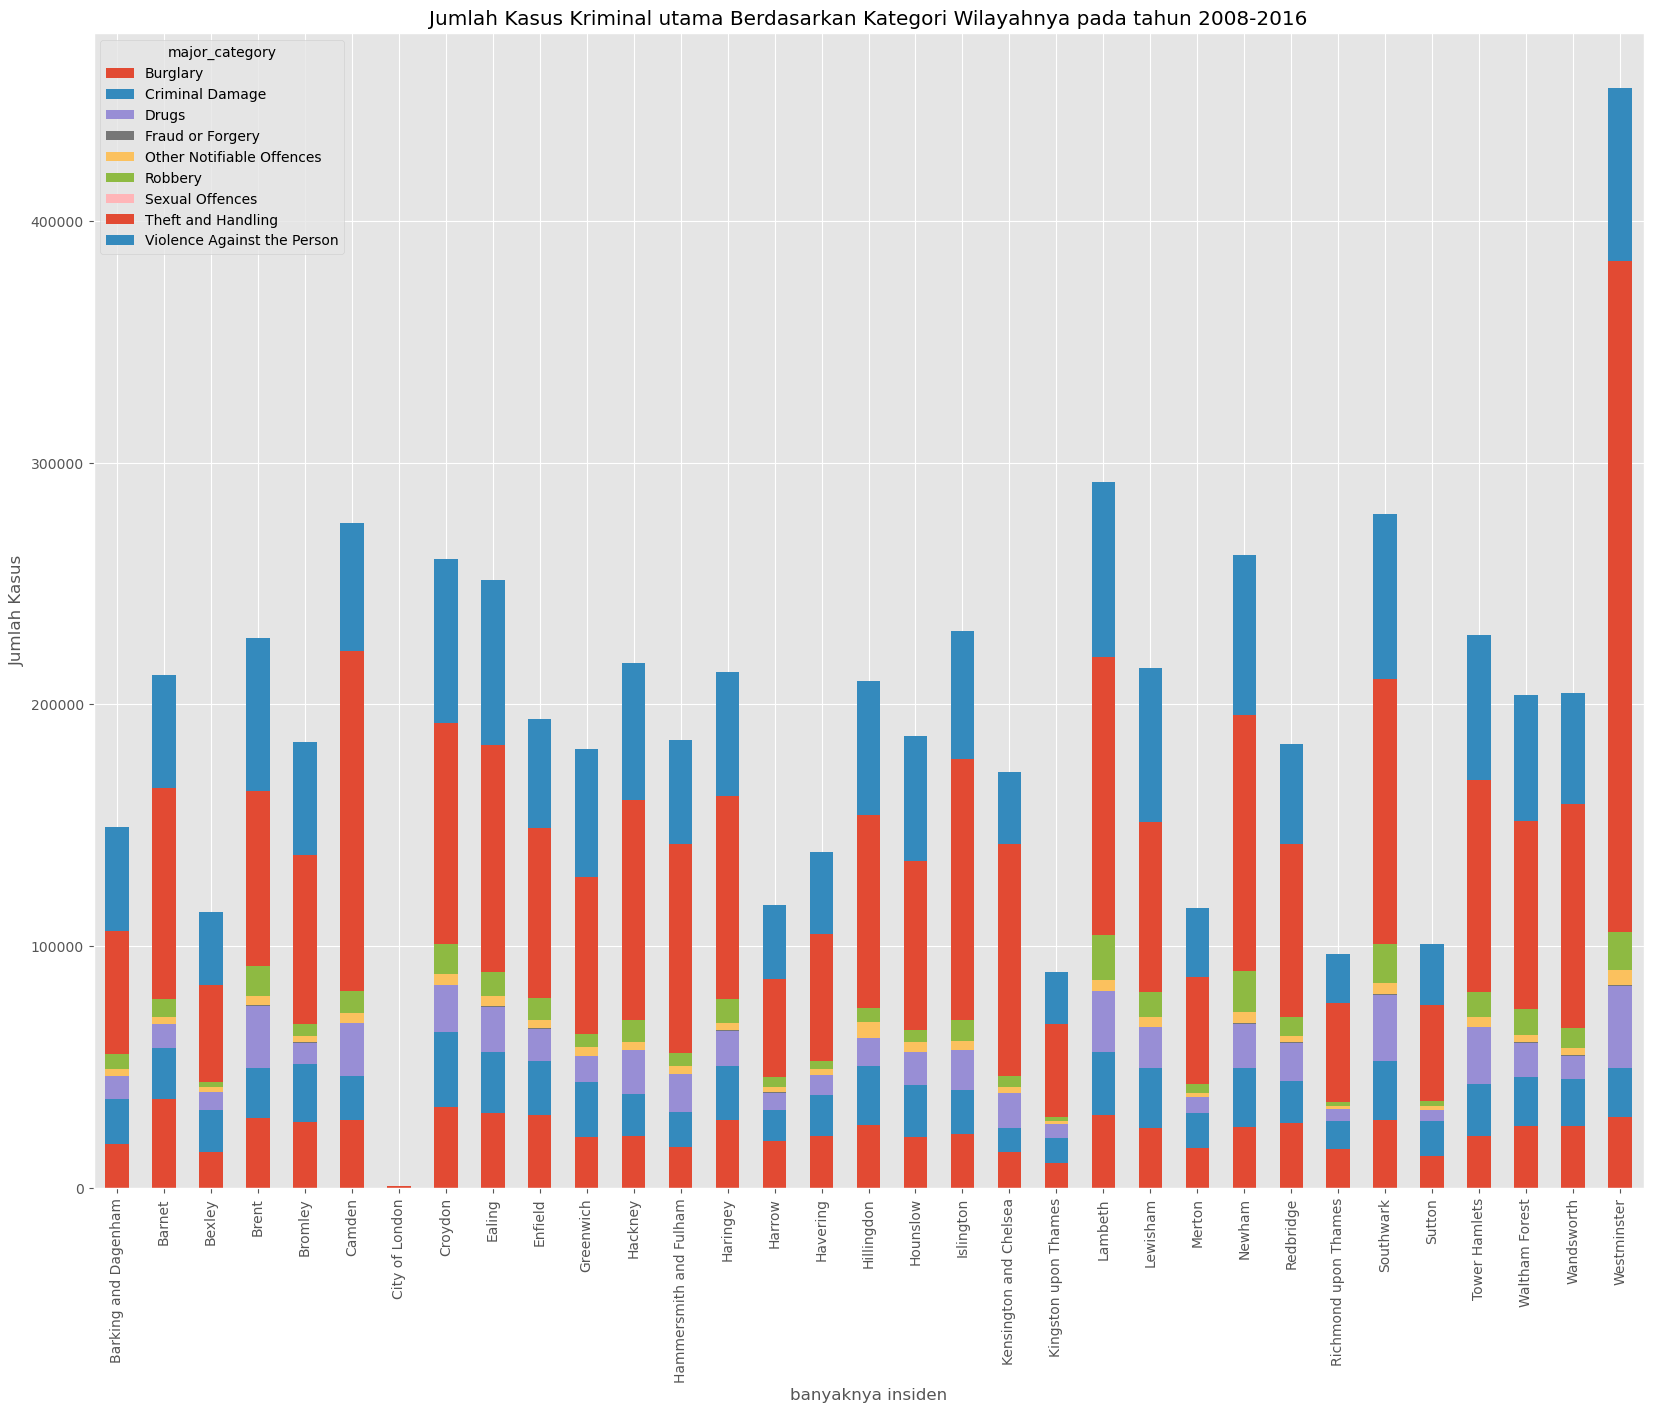

In [14]:
London2.plot(kind='bar',
             stacked=True, 
             figsize=(20,15))

plt.title('Jumlah Kasus Kriminal utama Berdasarkan Kategori Wilayahnya pada tahun 2008-2016')
plt.ylabel('Jumlah Kasus')
plt.xlabel('banyaknya insiden')

plt.show()

## Histogram

#### Question :
Berapa jumlah kriminal yang terjadi pada tahun 2016 ?

In [15]:
London_hist=London[(London['value']==1) & (London['year']==2016) & (London['major_category']=='Criminal Damage')]
London_hist.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
32,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
684,E01002650,Hounslow,Criminal Damage,Other Criminal Damage,1,2016,2
1627,E01003941,Southwark,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,12
1949,E01004317,Tower Hamlets,Criminal Damage,Criminal Damage To Dwelling,1,2016,8
2275,E01004236,Tower Hamlets,Criminal Damage,Other Criminal Damage,1,2016,8


In [16]:
London_hist1= London_hist.groupby(['month'])['value'].sum()
London_hist1.head()

month
1    3051
2    2970
3    3056
4    3082
5    3315
Name: value, dtype: int64

In [17]:
count, bin_edges = np.histogram(London_hist1)

print(count)
print(bin_edges)

[1 1 2 3 1 0 0 2 1 1]
[2918.  2967.7 3017.4 3067.1 3116.8 3166.5 3216.2 3265.9 3315.6 3365.3
 3415. ]


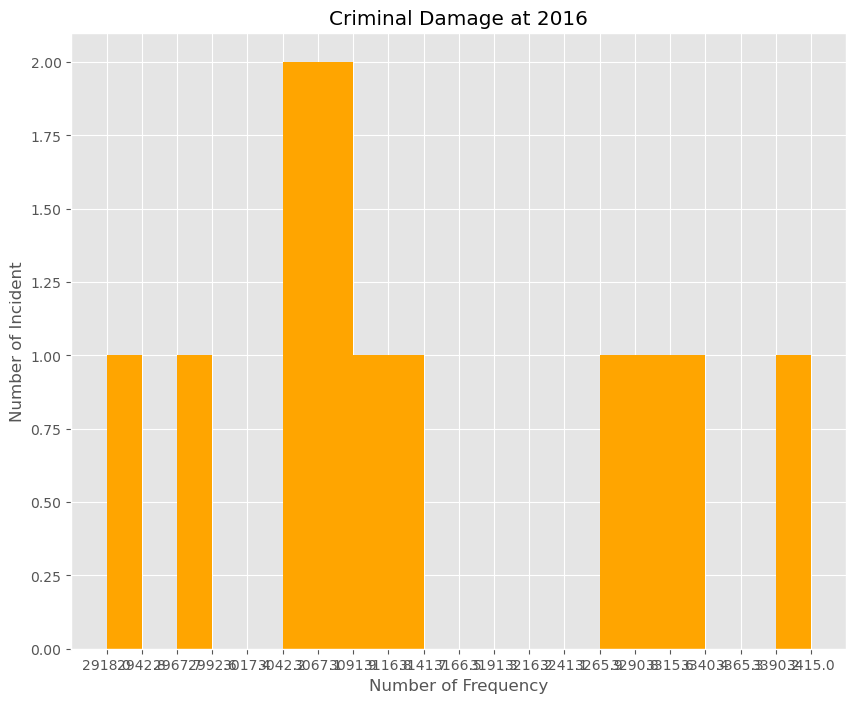

In [18]:
count,bin_edges=np.histogram(London_hist1,20)
London_hist1.plot(kind='hist',
                 figsize=(10, 8),
                 bins = 20,
                 alpha=1,
                 xticks=bin_edges,
                 color=['orange']
                 )
plt.title('Criminal Damage at 2016')
plt.ylabel('Number of Incident')
plt.xlabel('Number of Frequency')

plt.show()

#### Insight

Berdasarkan data, dapat dilihat bahwa frekuensi tindak kejahatan Criminal Damage pada tahun 2016 berkisar di angka 2-3 ribuan kasus. Kasus tertinggi terjadi pada bulan 5 dengan angka 3315 dan kasus terendah terjadi pada bulan 2 yaitu sebanyak 2970 kasus

## LIne Chart
#### Question:


In [19]:
Year=London['year'].unique()
sums_year=London.groupby('year').sum()
sums=sums_year['value'].to_numpy()
n = len(Year)

C:\Users\ACER\AppData\Local\Temp\ipykernel_9824\3667368363.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sums_year=London.groupby('year').sum()


In [20]:
for i in range(n):
    for j in range(0, n-i-1):
        if Year[j] > Year[j+1] :
                Year[j], Year[j+1] = Year[j+1], Year[j]
                sums[j], sums[j+1] = sums[j+1], sums[j]
 
print("Years:  ")
print(Year)
print("Sum of crimes happened in each year:")
pos1 = np.arange(len(Year))
print(sums)

Years:  
[2008 2009 2010 2011 2012 2013 2014 2015 2016]
Sum of crimes happened in each year:
[715324 736121 737329 711624 724915 686407 680183 717214 738641]


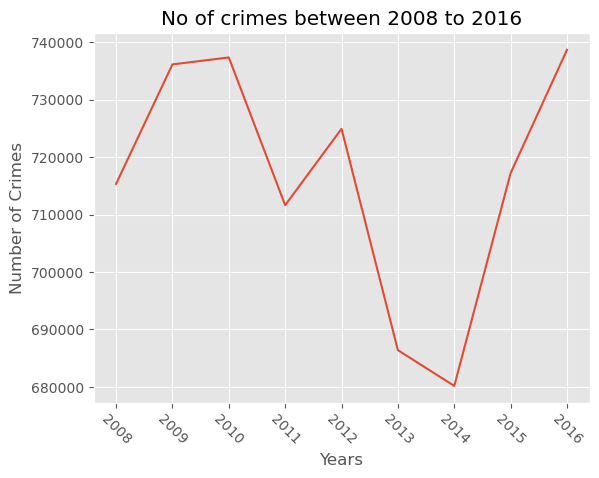

In [21]:
pos1 = np.arange(len(Year))

plt.plot(sums)
plt.xticks(pos1,Year)
plt.title("No of crimes between 2008 to 2016")
plt.xlabel('Years')
plt.ylabel("Number of Crimes")
plt.xticks(rotation=-45 )

plt.show()

## Pie Chart

#### Question:
Carilah total keseluruhan tindak kejahatan di london berdasarkan Tahun!

In [22]:
London_Pie= London.groupby(["major_category"])[["value"]].sum()
London_Pie.rename(columns={"value":"total_kasus"}, inplace=True)
London_Pie

,total_kasus
major_category,
Burglary,754293
Criminal Damage,630938
Drugs,470765
Fraud or Forgery,5325
Other Notifiable Offences,106349
Robbery,258873
Sexual Offences,1273
Theft and Handling,2661861
Violence Against the Person,1558081


In [23]:
sizes=London.groupby(['major_category']).size()
sizes

major_category
Burglary                       1043604
Criminal Damage                2069172
Drugs                          1179468
Fraud or Forgery                236520
Other Notifiable Offences       776304
Robbery                         939384
Sexual Offences                 108108
Theft and Handling             3966300
Violence Against the Person    3171744
dtype: int64

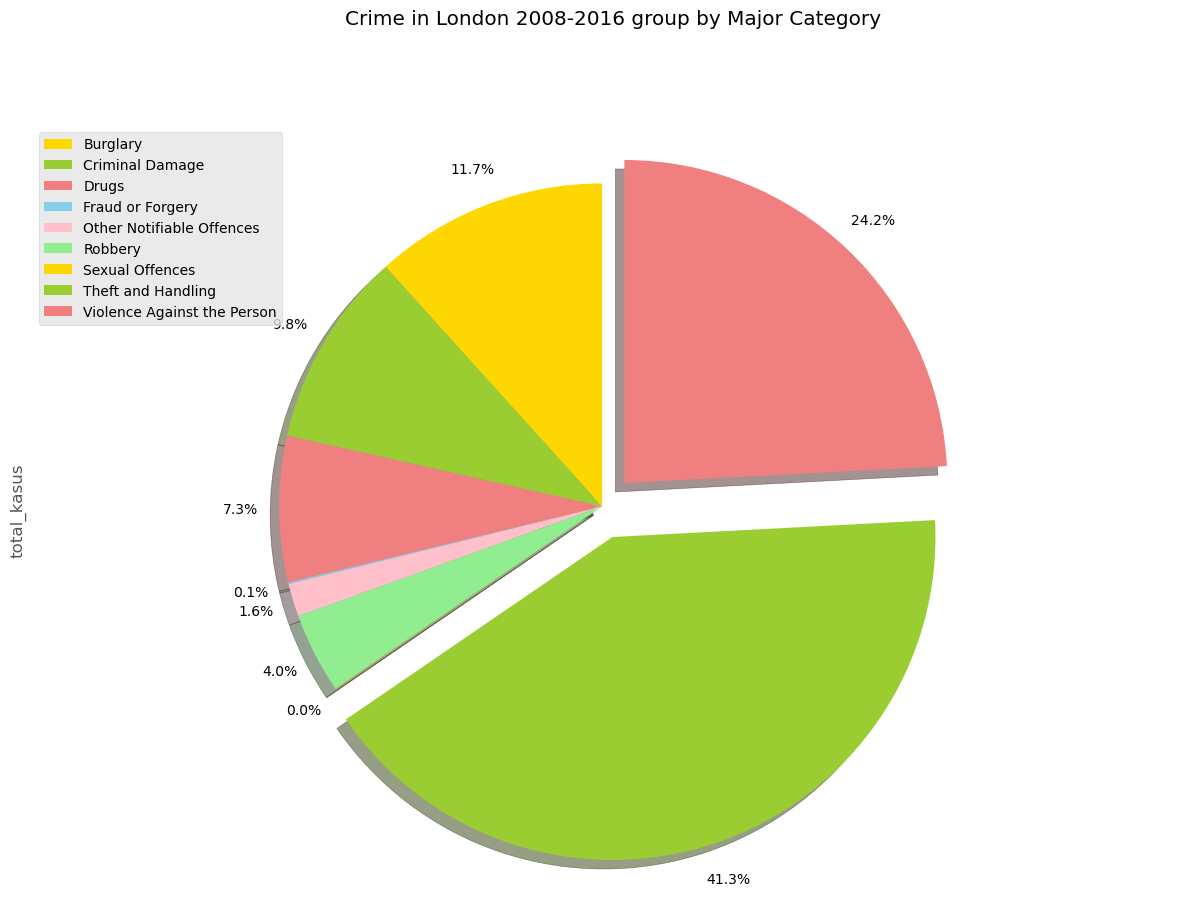

In [24]:
colors_list = ['gold','yellowgreen','lightcoral','skyblue','pink','lightgreen']
explode_list = [0.0,0.0,0.0,0.0,0.0,0.0,0,0.1,0.1]

London_Pie['total_kasus'].plot(kind='pie',
                        figsize=(15,10),
                        autopct='%1.1f%%',
                        startangle=90,
                        shadow=True,
                        labels=None,
                        pctdistance=1.12, #the ratio between the center of each pie slice and the start of the text generated by autopct
                        colors=colors_list,
                        explode=explode_list
                        )
plt.title('Crime in London 2008-2016 group by Major Category', y=1.12)
plt.axis('equal')
plt.legend(labels=London_Pie.index,loc='upper left')

plt.show()

##### Insight :

Sepanjang tahun 2008-2016, Tingkat kejahatan di London masih sangat tinggi. Jenis kejahatan yang paling banyak terjadi adalah pencurian ('theft and Handling') dan kejahatan seksual ('sexual offense') cukup jarang terjadi.

## Box Plot

#### Question :
Bagaimana tren kasus kriminal di wilayah Brent ?

In [25]:
London_Box = London[London['borough'] == 'Brent']
London_Box = London_Box .groupby(["major_category",'year'])[['value']].sum().reset_index()
London_Box = London_Box .pivot(index="year", columns="major_category", values="value")
London_Box

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
year,,,,,,,,,
2008,3266,2504,2813,157,274,1555,39,7206,5690
2009,3546,2647,2579,0,301,1630,0,7659,6386
2010,3445,2418,2980,0,415,1797,0,7932,6525
2011,3675,2301,4042,0,422,2027,0,8398,6804
2012,3936,2161,3428,0,456,1643,0,8338,6395
2013,3084,1994,3341,0,424,1143,0,7776,5997
2014,2639,2136,2891,0,472,876,0,7721,7691
2015,2701,2128,1808,0,411,883,0,8467,8485
2016,2631,2280,2096,0,536,919,0,9026,9205


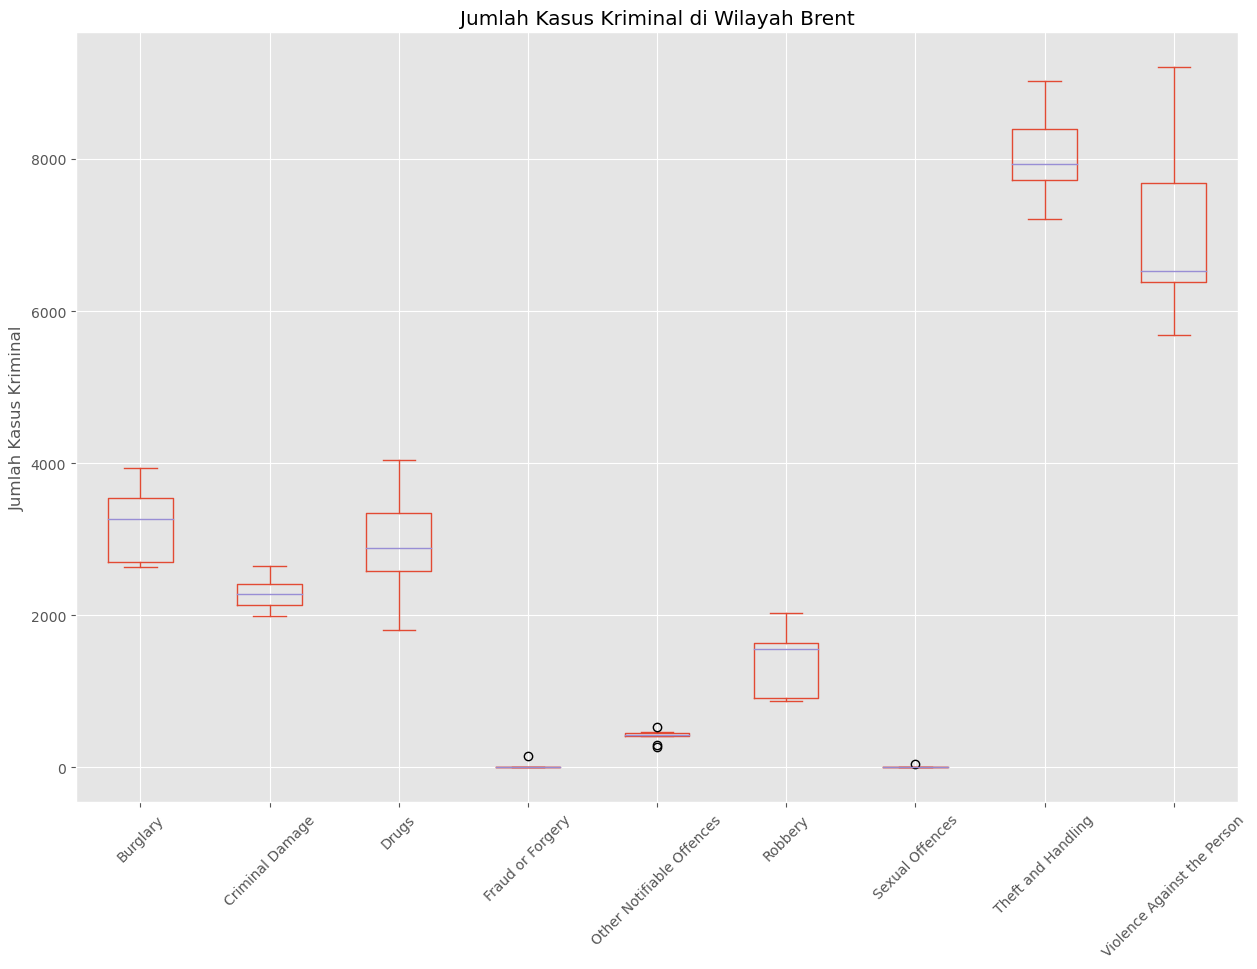

In [26]:
London_Box .plot(kind="box", figsize=(15,10))
plt.title("Jumlah Kasus Kriminal di Wilayah Brent")
plt.ylabel("Jumlah Kasus Kriminal")
plt.xticks(rotation=45)

plt.show()

#### Insight

Berdasarkan grafik di atas sekali lagi dibuktikan bahwa  kasus kriminal yang paling sering terjadi di wilayah Brent adalah Theft and Handling diikuti Violence againts a person. Untuk kasus sexual Offences terbilang masih cukup rendah.

Selain itu, dapat dilihat terdapat beberapa lingkaran yang menunjukkan indikasi adanya outlier atau data pencilan seperti pada Violence Against the Person yang artinya akan ada suatu waktu dimana kasus ini melonjak tinggi ke angka 12000an yang bahkan sebelumnya rata - rata hanya 6000 kasus.

## Scatter Plot

In [27]:
London_Scatt = London[London['borough'] == 'Brent']
London_Scatt= London_Scatt.groupby(["major_category",'year'])[['value']].sum().reset_index()
London_Scatt= London_Scatt.pivot(index="year", columns="major_category", values="value").reset_index()
London_Scatt.rename(columns={"index":"year"}, inplace=True)
London_Scatt

major_category,year,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
0,2008,3266,2504,2813,157,274,1555,39,7206,5690
1,2009,3546,2647,2579,0,301,1630,0,7659,6386
2,2010,3445,2418,2980,0,415,1797,0,7932,6525
3,2011,3675,2301,4042,0,422,2027,0,8398,6804
4,2012,3936,2161,3428,0,456,1643,0,8338,6395
5,2013,3084,1994,3341,0,424,1143,0,7776,5997
6,2014,2639,2136,2891,0,472,876,0,7721,7691
7,2015,2701,2128,1808,0,411,883,0,8467,8485
8,2016,2631,2280,2096,0,536,919,0,9026,9205


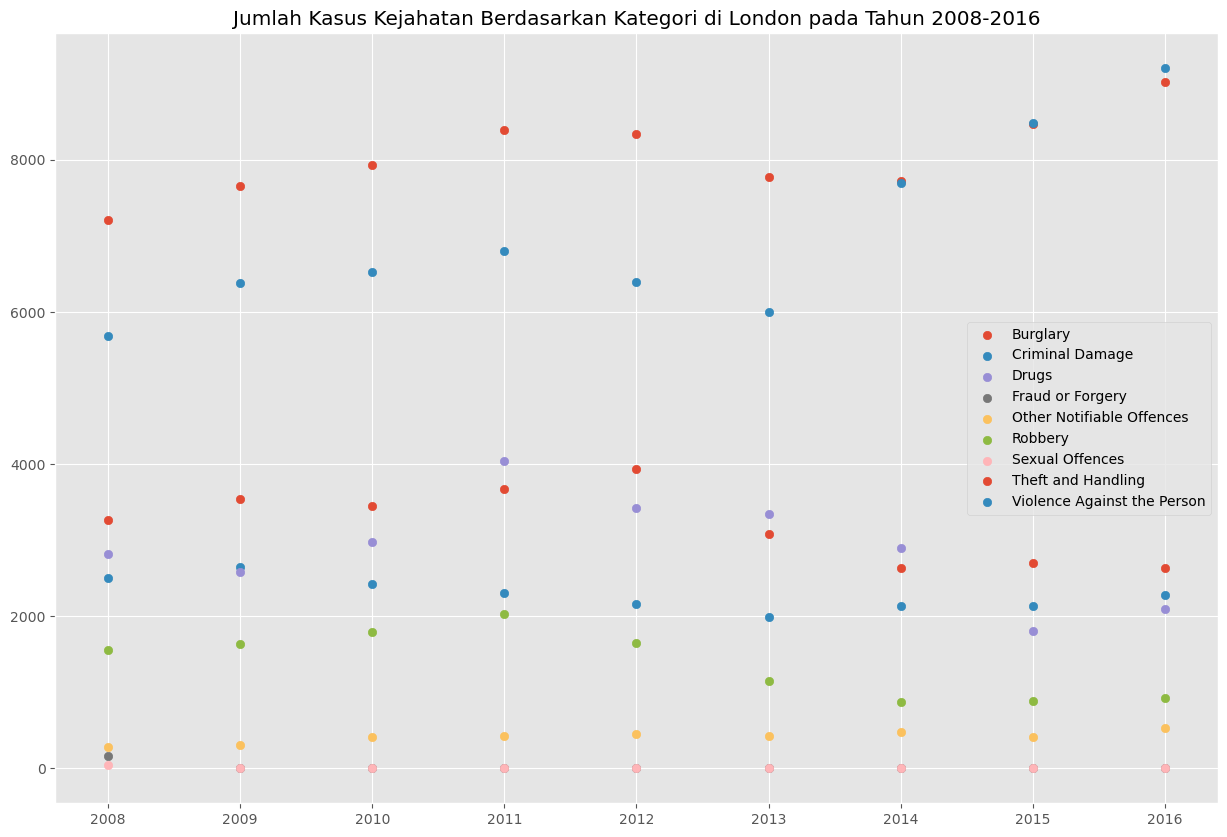

In [28]:
fig, ax = plt.subplots(figsize=(15, 10))

legend = []
for crime in London_Scatt.columns:
    if crime != 'year':
        legend.append(crime)
        ax.scatter(London_Scatt['year'], London_Scatt[crime])
        
ax.set_title('Jumlah Kasus Kejahatan Berdasarkan Kategori di London pada Tahun 2008-2016')
ax.legend(legend)
ax.grid(True)              
plt.show()

## Word Cloud

In [29]:
Word =pd.DataFrame(London, columns=['year','value'])
Word.head()

,year,value
0,2016,0
1,2016,0
2,2015,0
3,2016,0
4,2008,0


In [30]:
London_Word=Word[['year','value']].groupby(['year'], as_index=True).sum()
London_Word.head()

,value
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329


In [31]:
total_crime = London_Word["value"].sum()
max_words = 10000
word_string = ""

for year in London_Word.index.values:
    repeat = int(London_Word.loc[year, "value"]/float(total_crime)*max_words)
    word_string = word_string + (("Tahun'" + str(year)[2:] + ' ') * repeat)
word_string

"Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 Tahun'08 

In [32]:
wordcloud= WordCloud(background_color='black').generate(word_string)

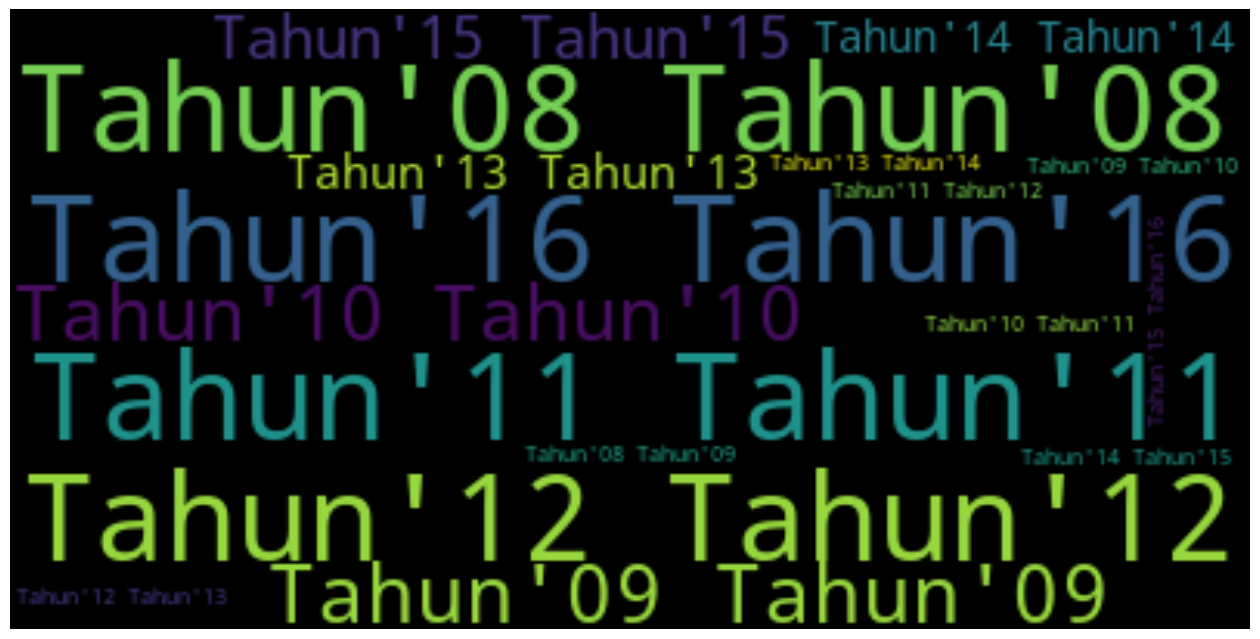

In [33]:
fig=plt.figure()
fig.set_figwidth(16)
fig.set_figheight(20)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Insight
Dari Word Clouds yang dibuat terlihat bahwa tahun 2016, 2012, 2011, dan 2008 adalah tahun dengan jumlah kasus yang besar.

## Folium Map

In [34]:
world_map = folium.Map()
world_map 

In [35]:
world_map=folium.Map(location=[51.50722, -0.1275], zoom_start=7)
world_map

In [36]:
world_map=folium.Map(location=[51.50722, -0.1275], zoom_start=7, tiles='Stamen Terrain')
world_map

## Conclusion

- Top 5 kejahatan yang terjadi dalam rentang 2008-2016 adalah Westminster tahun 2012, Lambeth tahun 2016,Southwark tahun 2008,Camden NaN,Newham tahun 2010
- Berdasarkan data, dapat dilihat bahwa frekuensi tindak kejahatan Criminal Damage pada tahun 2016 berkisar di angka 2-3 ribuan kasus. Kasus tertinggi terjadi pada bulan 5 dengan angka 3315 dan kasus terendah terjadi pada bulan 2 yaitu sebanyak 2970 kasus
- Sepanjang tahun 2008-2016, Tingkat kejahatan di London masih sangat tinggi. Jenis kejahatan yang paling banyak terjadi adalah pencurian ('theft and Handling') dan kejahatan seksual ('sexual offense') cukup jarang terjadi.
- Berdasarkan grafik di atas sekali lagi dibuktikan bahwa  kasus kriminal yang paling sering terjadi di wilayah Brent adalah Theft and Handling diikuti Violence againts a person. Untuk kasus sexual Offences terbilang masih cukup rendah. Selain itu, dapat dilihat terdapat beberapa lingkaran yang menunjukkan indikasi adanya outlier atau data pencilan seperti pada Violence Against the Person yang artinya akan ada suatu waktu dimana kasus ini melonjak tinggi ke angka 12000an yang bahkan sebelumnya rata - rata hanya 6000 kasus.
- Dari Word Clouds yang dibuat terlihat bahwa tahun 2016, 2012, 2011, dan 2008 adalah tahun dengan jumlah kasus yang besar.